In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [2]:
def visualise_mle_prediction(dataframe, no_features, first_feature, last_feature, location_line, line=False):
    fig, axes = plt.subplots(no_features, 1, figsize=(30,40))
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe["up time"]
    for i in range(first_feature, last_feature):
        # Values for drawing lower and upper bound
        target = dataframe.iloc[:,i].values
        mu = dataframe.iloc[:,i+no_features].values
        sigma = dataframe.iloc[:,i+2*no_features].values
        lower_bound = mu - 2*sigma
        upper_bound = mu + 2* sigma
        
        # Values about appearance of anomaly 
        palette = []
        anomaly_label = dataframe.iloc[:, i+4*no_features+1].values
        if 0 in anomaly_label and 1 not in anomaly_label:
            palette = ["blue"]
        elif 1 in anomaly_label and 0 not in anomaly_label:
            palette = ["red"]
        elif 0 in anomaly_label and 1 in anomaly_label:
            palette = ["blue","red"]

        # Prediction of mu
        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=columns[i+ no_features], 
                     ax=ax[i-first_feature],
                     linewidth=1,
                     color="black")
        
        # Confidence bound (+- 2 sigma)
        ax[i-first_feature].fill_between(t, lower_bound, upper_bound, color="grey", alpha=0.5)
        
        # Target values (actual sensor values)
        sns.scatterplot(data=dataframe, 
                        x=t, 
                        y=columns[i],
                        ax=ax[i-first_feature], 
                        hue=columns[i+4*no_features+1],
                        palette=palette
                        )
        
        # Line to show known failures
        if line:
            for location in location_line:
                ax[i-first_feature].axvline(location, 0,2, color="r", linestyle ="--", linewidth=2)

# Visualisation and Evaluation of Prediction
## Failures

In [3]:
all_failures_67 =[3807966., 3814610., 3815890., 3816362., 3856686., 3860122., 3865202., 3867646., 3868170.,
       3870094., 6539522., 6549554., 6572426., 6573162., 6574566., 6575118., 6575566., 6577254., 6582502., 6586022.]

## Examples of predictions before failures 

In [4]:
artifical_data = pd.read_csv("../../files/prediction/MLE/phm_recipe_67.csv", sep=";")
subset_1 = artifical_data.loc[(artifical_data["up time"]>= 3805966) & (artifical_data["up time"]<= 3818362)]

In [13]:
failures = [3807966., 3814610., 3815890., 3816362.]

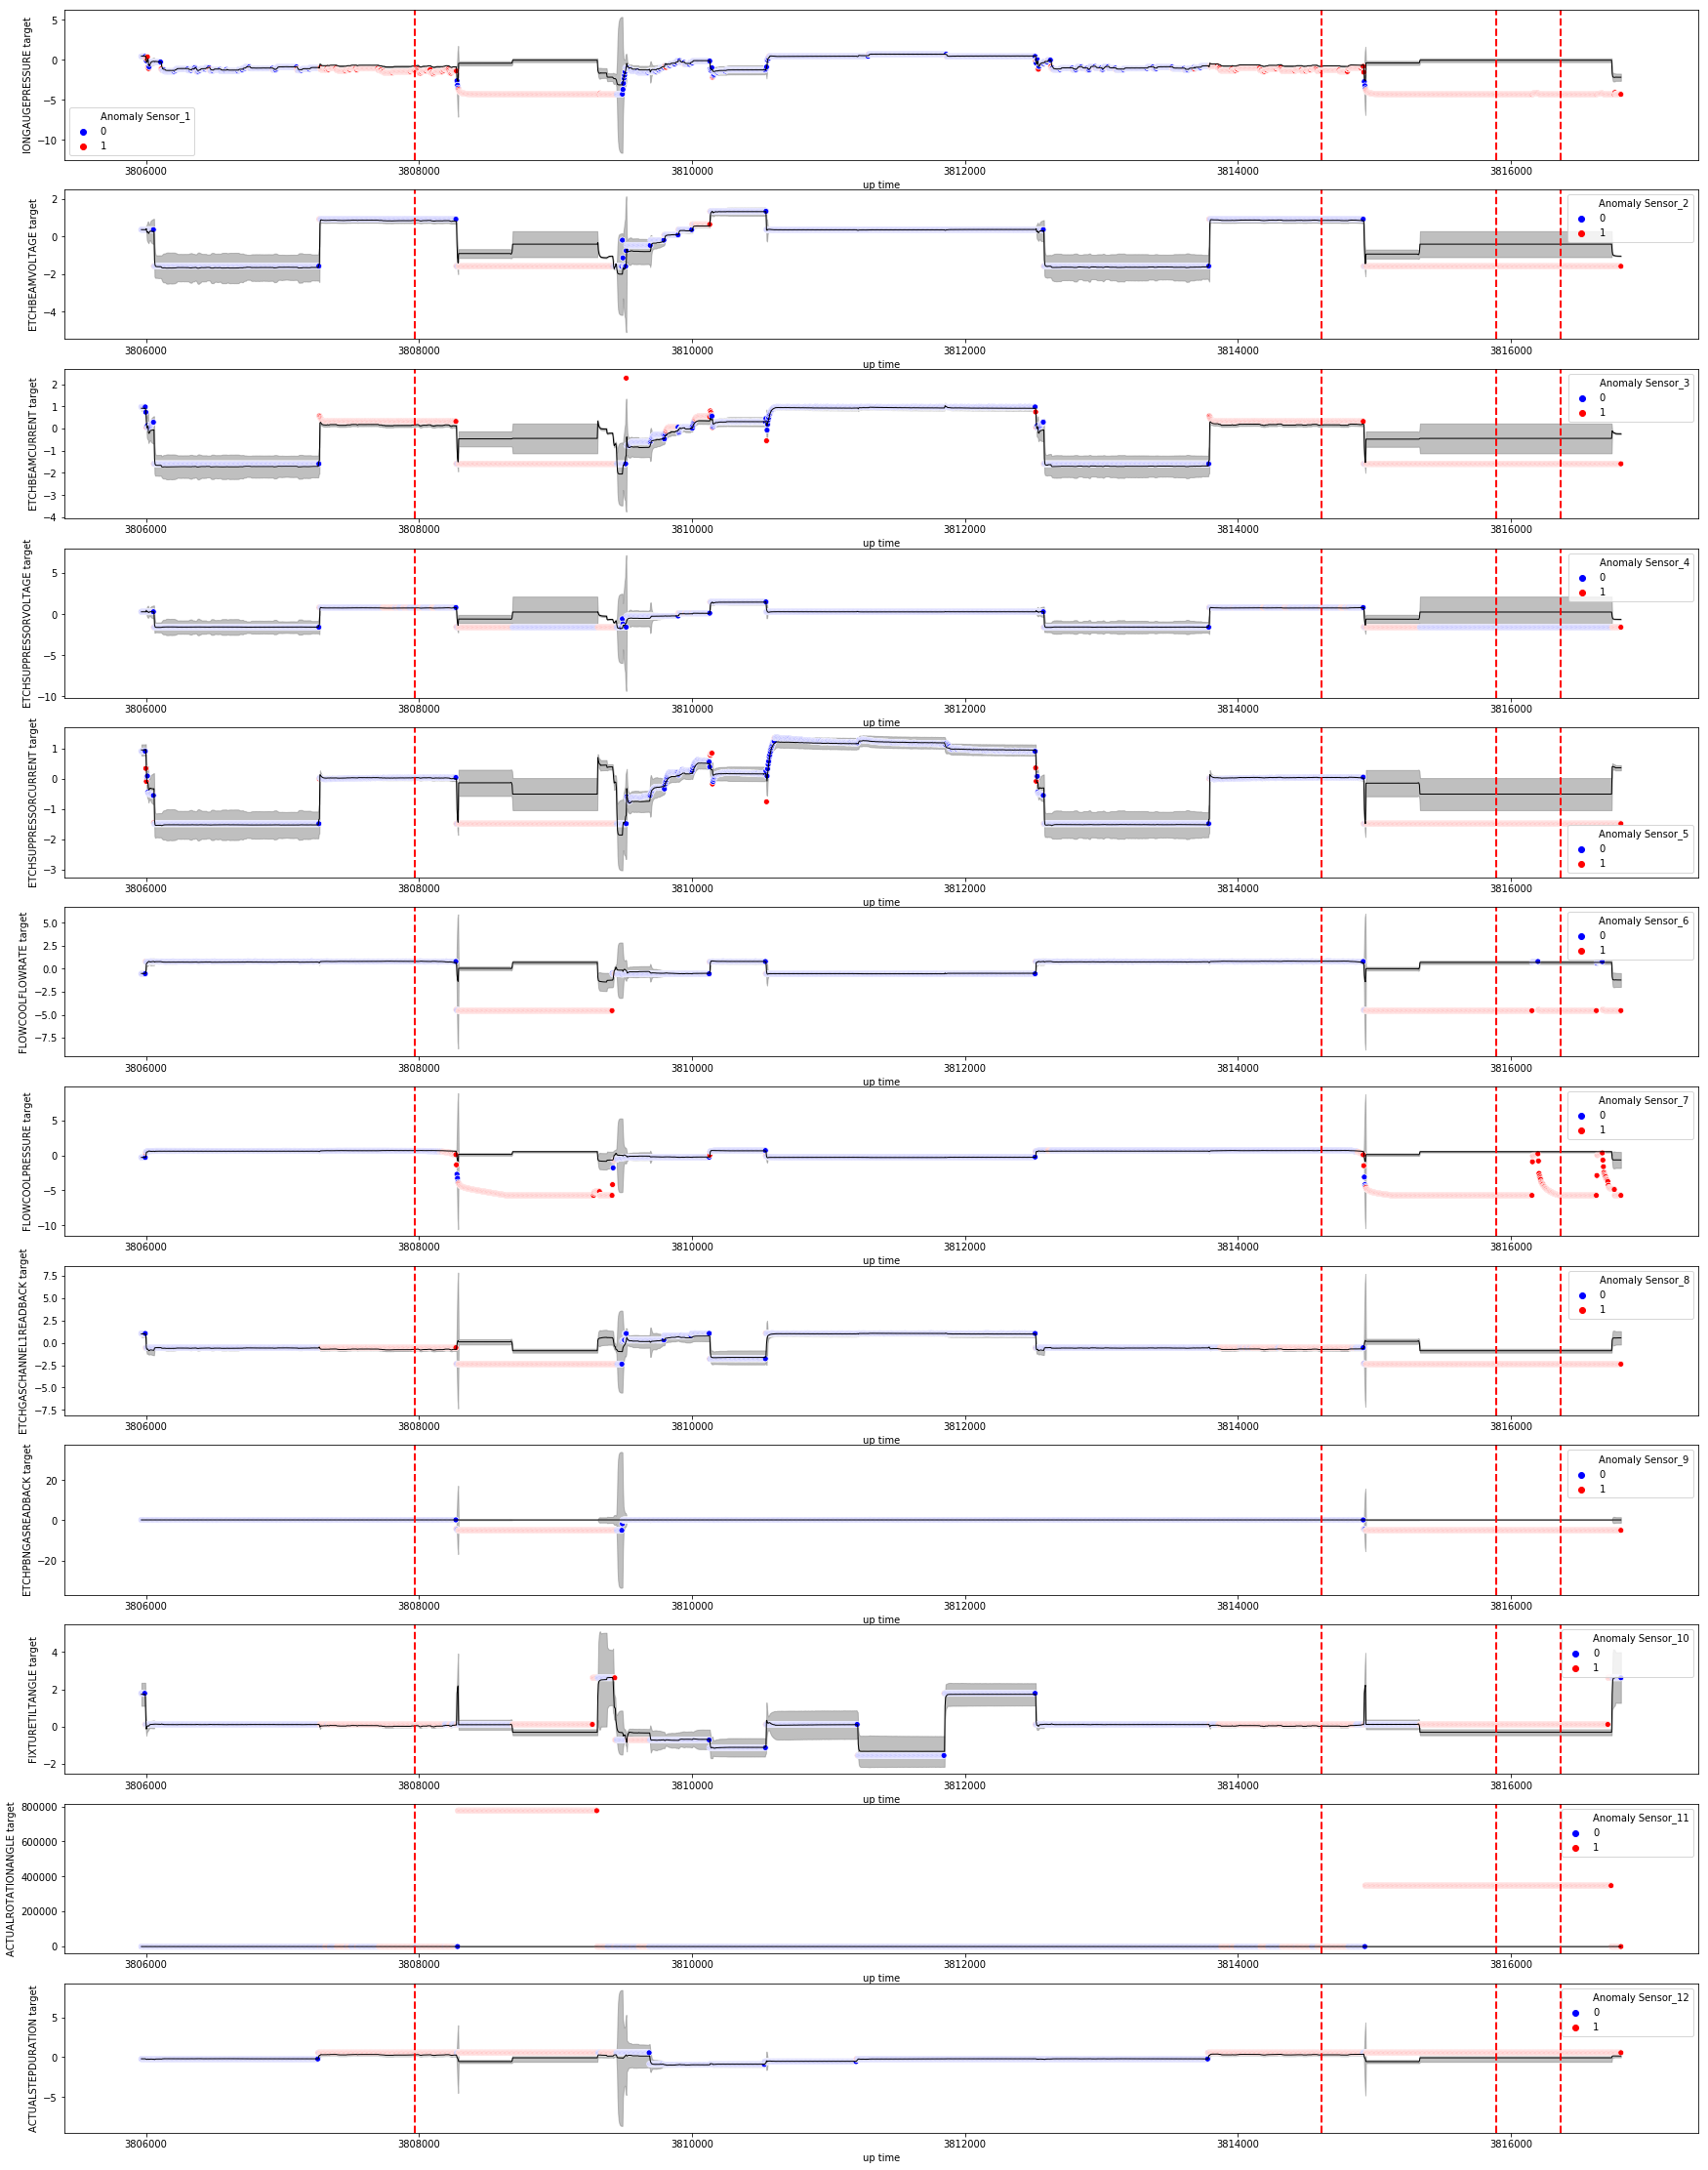

In [14]:
visualise_mle_prediction(dataframe = subset_1,
                         no_features=12, 
                         first_feature=1, 
                         last_feature=13,
                         line = True,
                         location_line = failures
                        )
plt.show()

In [4]:
artifical_data = pd.read_csv("../../files/prediction/MLE/phm_recipe_67.csv", sep=";")
subset_2 = artifical_data.loc[(artifical_data["up time"]>= 3853686) & (artifical_data["up time"]<= 3872094)]

In [5]:
failures = [3856686., 3860122., 3865202., 3867646., 3868170.,3870094.]

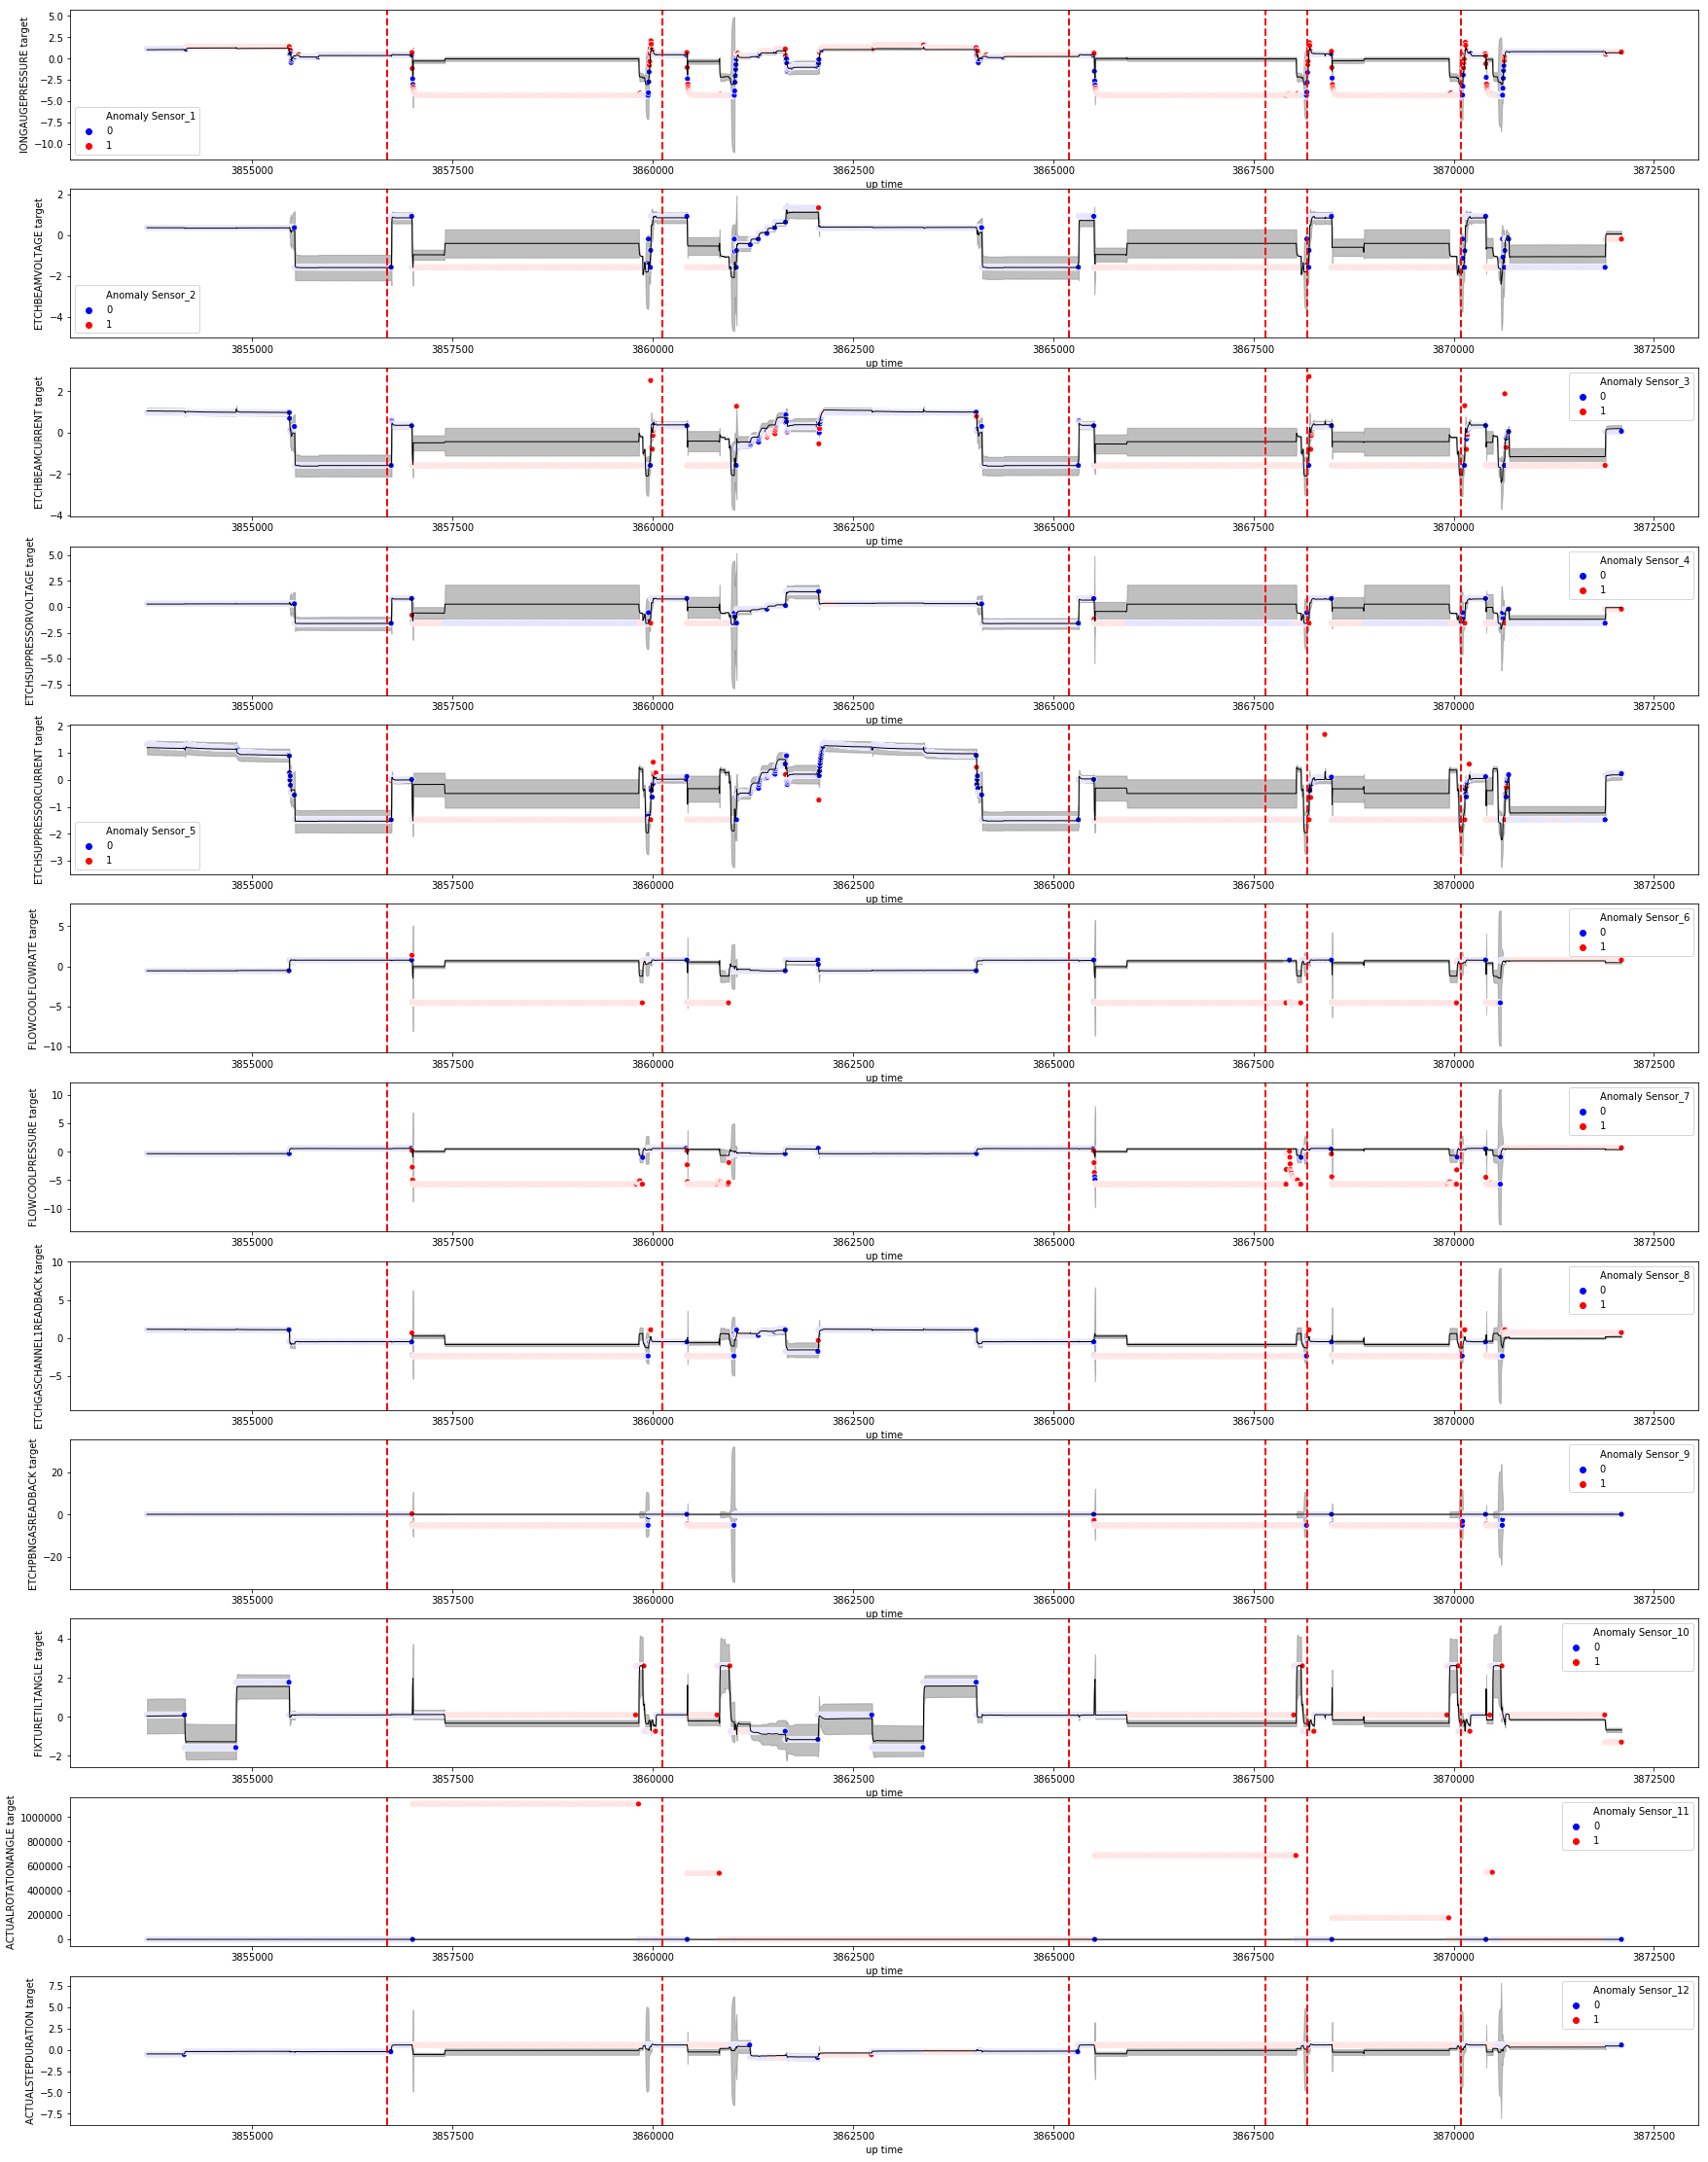

In [6]:
visualise_mle_prediction(dataframe = subset_2,
                         no_features=12, 
                         first_feature=1, 
                         last_feature=13,
                         line = True,
                         location_line = failures
                        )
plt.show()